In [4]:
# http://learn.astropy.org/FITS-images.html

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import glob

In [2]:
from astropy.utils.data import download_file
from astropy.io import fits

Very simple script which shows how to 

* combine images, 
* make a master bias and flat 
* process data using this master bias and flat. 


In [3]:
#ON IAP computers, set the path to this:
#data_dir = "/poubelles/broque1NS/tmp/hjmcc/tpnocturne-2019"

data_dir = "/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/"
output_dir = "/Users/hjmcc/Dropbox/teaching/m1/processed/"

In [4]:
image_file = os.path.join(data_dir,'Bias/test1_Bias_1_secs_2019-11-20T15-24-21_110.fits')

In [5]:
image_file

'/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-24-21_110.fits'

In [6]:
hdu_list = fits.open(image_file)

In [7]:
hdu_list.info()

Filename: /Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-24-21_110.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (3352, 2532)   int16 (rescales to uint16)   


In [8]:
image_data = hdu_list[0].data

In [9]:
np.std(image_data[1000:2000,100:2000])

27.17377677711783

In [10]:
image_data = fits.getdata(image_file)
from matplotlib.colors import LogNorm

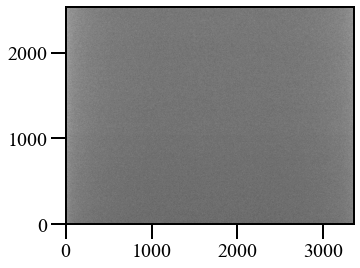

In [11]:
plt.imshow(image_data, cmap='gray', vmin=900,vmax=1100)


In [37]:
image_list = glob.glob(data_dir+'Bias/test1_Bias_1_secs_2019*???.fits')
np.size(image_list)

110

In [38]:
# The long way
image_concat = []
for image in image_list:
    image_concat.append(fits.getdata(image))

In [39]:
image_list

['/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-22-58_070.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-24-11_105.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-23-06_074.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-21-14_022.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-21-08_019.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-14-26_006.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-14-22_004.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-23-56_098.fits',
 '/Users/hjmcc/Dropbox/teaching/m1/tp-nocturne/2019/data/Bias/test1_Bias_1_secs_2019-11-20T15-21-10_020.fits',
 

In [40]:
final_bias = np.median(image_concat, axis=0)

In [41]:
final_bias.shape

(2532, 3352)

In [42]:
fits.getdata(image).shape

(2532, 3352)

In [43]:
#final_image = np.zeros(shape=image_concat[0].shape)
#for image in image_concat:
#    final_image += image
#final_image = final_image / 10.0 

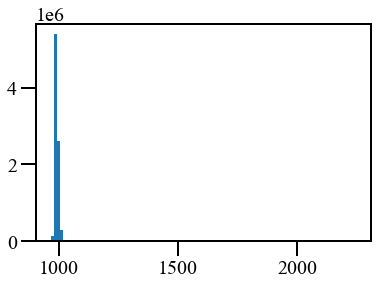

In [44]:
image_hist = plt.hist(final_bias.flatten(), bins=100)

In [45]:
np.std(final_bias[1000:2000,100:2000])

4.889461388560079

In [46]:
np.std(image_data[1000:2000,100:2000])/np.sqrt(110.0)

2.5909179565492515

Note the noise in the master bias is *higher* than would expect from Poisson statistics. There
may be some other source of noise in the images (e.g., electrical noise) 

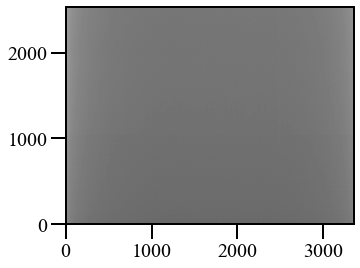

In [47]:
plt.imshow(final_bias, cmap='gray', vmin=900,vmax=1100)


In [49]:
outfile = output_dir+'median_bias.fits'
hdu = fits.PrimaryHDU(final_bias)
hdu.writeto(outfile, overwrite=True)

In [50]:
flat_list = glob.glob(data_dir+'/students/groupe2/Flat/OIII/Flat*OIII_30_secs*fits')
np.size(flat_list)

10

In [51]:
image_concat = []
for image in flat_list:
    image_concat.append(fits.getdata(image)-final_bias)
# subtract the bias at each step. 

In [52]:
# now get final flat 
flat = np.median(image_concat, axis=0)

In [53]:
final_flat = flat/np.mean(flat) 

In [54]:
final_flat

array([[0.92674253, 0.89805081, 0.92674253, ..., 0.96978011, 0.98986432,
        0.98018086],
       [0.91885231, 0.96511771, 0.93714328, ..., 0.97408387, 1.00385153,
        0.98018086],
       [0.92710118, 0.91670043, 0.93857787, ..., 0.98735379, 0.99739589,
        1.00923123],
       ...,
       [0.96691094, 0.98161545, 0.95471696, ..., 0.97229064, 1.01568686,
        1.001341  ],
       [0.97336658, 0.9557929 , 0.96511771, ..., 0.9866365 , 1.03792295,
        0.99273349],
       [0.98807108, 0.99201619, 0.94718538, ..., 1.02321844, 1.03146731,
        1.05047557]])

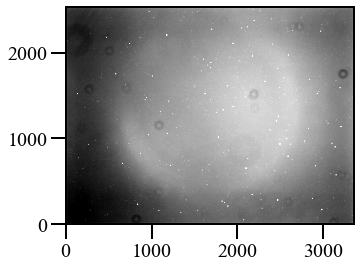

In [55]:
plt.imshow(final_flat, cmap='gray', vmin=0.9,vmax=1.1)


In [56]:
outfile = output_dir+'final_flat.fits'
hdu = fits.PrimaryHDU(final_flat)
hdu.writeto(outfile, overwrite=True)

In [57]:
image_list = glob.glob(data_dir+'Light/OIII/*60*fits')
np.size(image_list)

15

In [58]:
final_flat_trim=final_flat[:,1:]

In [59]:
final_bias_trim=final_bias[:,1:]

In [60]:
fits.getdata(image).shape

(2532, 3352)

In [61]:
import pathlib
#print(pathlib.Path(image).suffix)
filename,file_extension=os.path.splitext(image)
output_dir+os.path.basename(filename)+'_pr.fits'

'/Users/hjmcc/Dropbox/teaching/m1/processed/Flat_OIII_30_secs_2019-12-12T21-06-59_004_pr.fits'

Now process all images with this master flat and master bias. 

In [62]:
image_concat = []
for image in image_list:
#    print(fits.getdata(image).shape)
    processed = (fits.getdata(image)-final_bias_trim)/final_flat_trim
    image_concat.append(processed) 
    filename,file_extension=os.path.splitext(image)
    outfile=output_dir+os.path.basename(filename)+'_pr.fits'
    hdu = fits.PrimaryHDU(processed)
    hdu.writeto(outfile, overwrite=True)
    print(outfile)


/Users/hjmcc/Dropbox/teaching/m1/processed/M57_Light_OIII_60_secs_2019-12-04T18-52-53_004_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M27_Light_OIII_60_secs_2019-12-04T19-22-39_001_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M27_Light_OIII_60_secs_2019-12-04T19-26-48_005_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M 57_Light_OIII_60_secs_2019-12-09T21-44-10_001_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M 57_Light_OIII_60_secs_2019-12-09T21-48-19_005_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M57_Light_OIII_60_secs_2019-12-04T18-51-51_003_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M 57_Light_OIII_60_secs_2019-12-09T21-46-14_003_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M27_Light_OIII_60_secs_2019-12-04T19-24-44_003_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M 57_Light_OIII_60_secs_2019-12-09T21-45-12_002_pr.fits
/Users/hjmcc/Dropbox/teaching/m1/processed/M27_Light_OIII_60_secs_2019-12-04T19-23-41_002_pr.fits
/Users/hjmcc/Dro